In [1]:
# Classification (Logistic Regression)
# -> yes or no
# -> 1 or 0 (Binary Classification)
# Logistic Regression is a method to predict a dependent variable, given a set of independent varible such that the output is categorical.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('titanic_train.csv')

In [4]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.shape

(891, 12)

In [9]:
round(100*(df.isnull().sum() / len(df.index)), 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

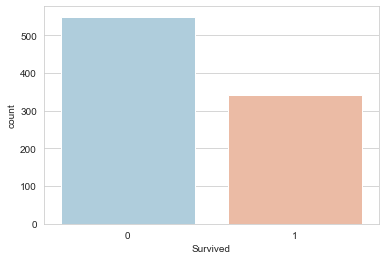

In [10]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = df, palette = 'RdBu_r')
plt.show()

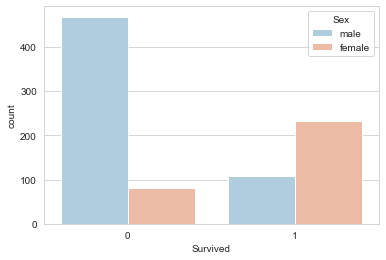

In [11]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = df,hue = 'Sex',  palette = 'RdBu_r')
plt.show()

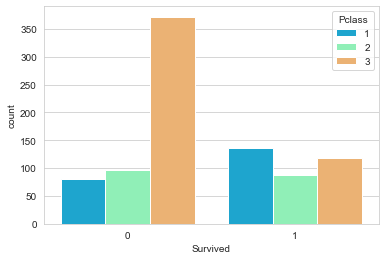

In [12]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = df,hue = 'Pclass',  palette = 'rainbow')
plt.show()

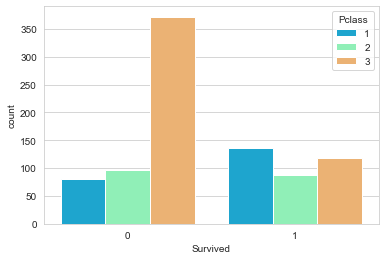

In [13]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = df,hue = 'Pclass',  palette = 'rainbow')
plt.show()

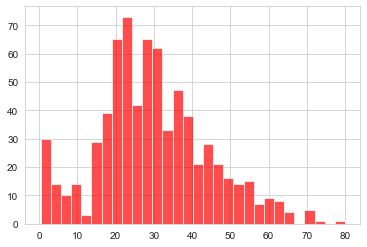

In [14]:
df['Age'].hist(bins = 30, color='red', alpha = 0.7)
plt.show()

In [15]:
#Data Cleaning

#drop the cabin var

df.drop(['Cabin'], axis = 1, inplace = True)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


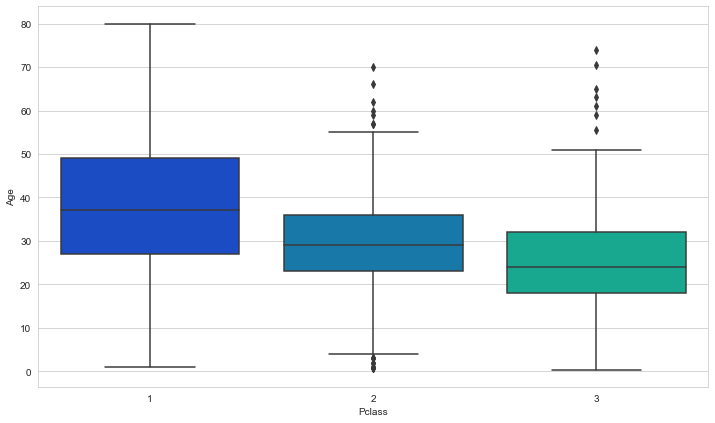

In [16]:
#Impute the age column using mean

#Categorical Data analysis
# -> age - Bucketing


#Pclass and Age

plt.figure(figsize = (12,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = df, palette = 'winter')
plt.show()

In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else :
            return 24
    else:
        return Age
    

In [18]:
df['Age'] = df[['Age','Pclass']].apply(impute_age, axis = 1)

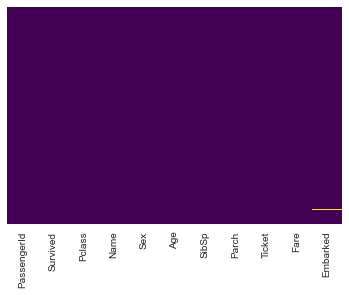

In [19]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

In [20]:
df.dropna(inplace = True)


In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
#convert categorical features
#Dummy variables

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [23]:
sex = pd.get_dummies(df['Sex'], drop_first = True)

In [24]:
embark = pd.get_dummies(df['Embarked'], drop_first = True)

In [25]:
df.drop(df[['Sex','Embarked','Ticket']], axis = 1, inplace = True)

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500


In [27]:
df.drop(df[['Name']], axis = 1, inplace = True)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [29]:
pd.concat([df,sex,embark],axis = 1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [30]:
#Build the Logistic regression model

X_train, X_test, y_train, y_test = train_test_split(df.drop(['Survived'], axis = 1), df['Survived'], train_size=0.7, test_size=0.3, random_state = 101)

In [31]:
#Train our logistic regression model -- fit the model into our train data


In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
#instantiate
#Basically LogisticRegresssion is a class

logmodel = LogisticRegression()

In [34]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [35]:
predictions = logmodel.predict(X_test)


In [36]:
print(predictions)

[0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0
 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 1 0]


In [37]:
#evaluate our model using confusion matrix
from sklearn.metrics import classification_report 

In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       163
           1       0.71      0.49      0.58       104

    accuracy                           0.72       267
   macro avg       0.72      0.68      0.69       267
weighted avg       0.72      0.72      0.71       267



In [ ]:
Bias -> is the difference between average prediction of our model and the actual value which we are trying to predict

Variance -> is the measure of variability that is measured when even a small fluctuation in the training set are magnified. How much a random variable differs expected value.